<a href="https://colab.research.google.com/github/alond-ra/numericalmethods/blob/main/M%C3%A9todosNum%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alondra Galván Patlán 

Guías Métodos Numéricos

09/12/21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Primer parcial

## Problema 1

1. Usa el método de Gauss-Jordan para resolver el siguiente sistema

\begin{align*} 
    \begin{pmatrix}
         4 & 4 & 8 & 4 & | & 1 \\
         4 & 5 & 3 & 7 & | & 2 \\
         8 & 3 & 9 & 9 & | & 3 \\
         4 & 7 & 9 & 5 & | & 4
    \end{pmatrix}
\end{align*}
Comenta el comportamiento del método y las dificultades que posiblemente presentaste.\\
Luego aplica un método iterativo apropiado y justifica la elección. Además, estudia el
número de condición de la matriz de coeficientes asociada, y justifica si es un problema bien
condicionado.

**Respuesta**: Notemos que no es un sistema bien condicionado ya que


\begin{align*}
    k(A) &= 27603999.9409\\
    det(A) &= 0.
\end{align*}
Esto es, tiene un número de condición muy grande y un determinante muy pequeño; por lo que el sistema está mal condicionado.
Además, como el determinante es 0, no se puede aplicar el método de Gauss-Jordan.

Por otro lado, notamos que no es diagonalmente dominante, basta con tan solo observar el primer renglón $4 < 16$.
Este sistema no puede reordenarse para ser diagonalmente convergente ya que, en el 3er renglón, el número 9 es el más grande, pero está dos veces, por lo que la suma del resto de elementos que no estén en la diagonal (sea cual sea el que esté en la diagonal) siempre será mayor que el elemento en la diagonal. 

Reafirmando lo anterior, se tiene que, las condiciones para tener convergencia en los métodos de Jacobi y de Gauss Jordan, que dependen de los siguientes radios espectrales:
\begin{align*}
    \textrm{Jacobi: } \rho(D^{-1}(L+U)) &=17.16666\\
    \textrm{Gauss-Seidel: } \rho((L+D)^{-1}U) &=5.733333\\
\end{align*}

Para tener una convergencia en cada uno de los casos, es necesario que dichos radios espectrales sean $<1$. 

De modo que no se puede aplicar un método iterativo al sistema establecido.

In [ ]:
# códigos pertinentes

# Gauss - Jordan -----------------------------------------------------------------
def min_api_not_zero(A,i,n): #A es matriz, i >=0
  for p in range(i,n+1):
    if (A[p,i] != 0):
      return p
  return -1 # significa que no hay un p que haga a_pi distinto de 0

def gauss_jordan(a,n):  # a = matriz de n x n+1 correspondiente al sistema de ecuaciones a resolver
  #if np.linalg.det(a) == 0:
   # return

  x = np.zeros(n) #respuesta que se regresará
  for i in range(0,n):
    p = min_api_not_zero(a,i,n) #p es el entero más pequeño tq i<=p<=n y A_pi != 0
    
    if p == -1:
      print('no existe solución única')
    
    if p != i:  # intercambio de renglones
      #d = np.copy(a[0])
      d = [a[0,0],a[0,1],a[0,2],a[0,3],a[0,4],a[0,5]]
      #d = a[0]
      a[0] = a[1]  
      a[1] = d  

  for i in range(n):
      for j in range(n):
          if i != j:
              if a[i,i] == 0:
                print('No hay solución, a_',i,',',i,'=', a[i,i])
                print('Se perturba el sistema asignando a[i,i] = 10^-1')
                a[i,i] = 0.1 # ESTA ES LA MODIFICACIÓN PARA NO DIVIDIR ENTRE CERO
                #return

              m_ji = float(a[j,i])/float(a[i,i])

              for k in range(n+1):
                  a[j,k] = float(a[j,k]) - float(m_ji) * float(a[i,k])

  for i in range(n):
    x[i] = a[i,n]/a[i,i]
    if a[i,i] != 0: a[i,i] = 1
    #a[i,i] = 1
    a[i,n] = x[i]

  return x


# Gauss- Seidel -------------------------------------------------------------------
def gauss_Seidel(n, A, b, x0, tol, N ):
  k = 1
  x = np.zeros(n)
  while k<=N:
    for i in range(n):
      AX = 0
      AX0 = 0
      for j in range(i):
        AX = AX + A[i,j]*x[j]
      for j in range(i+1,n):
        AX0 = AX0 + A[i,j]*x0[j]

      x[i] = (1/A[i,i]) *(-AX -AX0 + b[i])
      
      if norma_vect(x-x0) < tol:
        print(k,'&' ,x[0],'&' ,x[1],'&' ,x[2], '\\\\')
        print('Número de iteraciones hasta convergencia: ',k)
        return x

      print(k,'&' ,x[0],'&' ,x[1],'&' ,x[2], '\\\\')
      k = k+1
      x0 = np.array(x, copy = True)

  return('falló en el max de iteraciones') 

# SOR --------------------------------------------------------------------------
def SOR(n, A, b, x0 , omega, tol, N): # num de ecs, matriz del sist, vect sol, 
  k = 1                               # sol inicial, param relaj , tolerancia, # max its
  x = np.zeros(n)

  while k <= N :
    for i in range(n):
      AX = 0
      AX0 = 0
      for j in range(i):
        AX = AX + A[i,j]*x[j]
      for j in range(i+1,n):
        AX0 = AX0 + A[i,j]*x0[j]

      x[i] = (1-omega)*x0[i] + (1/A[i,i]) * omega*( - AX - AX0 + b[i])
      
      if norma_vect(x-x0) < tol:
        print(k,'&' ,x[0],'&' ,x[1],'&' ,x[2], '\\\\')
        print('Número de iteraciones hasta convergencia: ',k)
        return x

      print(k,'&' ,x[0],'&' ,x[1],'&' ,x[2], '\\\\')
      k = k+1
      x0 = np.array(x, copy = True)

  return 'falló en el max de iteraciones' 

In [ ]:
# implementación del problema
# Para Gauss-Jordan
n = 4
A = np.array([[4.,4.,8.,4., 1.],
               [4.,5.,3.,7., 2.],
               [8.,3.,9.,9., 3.],
               [4.,7.,9.,5., 4.]])
print(A)

# matriz asociada al sistema ; para el metodo iterativo
B = np.matrix([[4,4,8,4],
               [4,5,3,7],
               [8,3,9,9],
               [4,7,9,5]])

x = gauss_jordan(A,n)
print(x)

[[4. 4. 8. 4. 1.]
 [4. 5. 3. 7. 2.]
 [8. 3. 9. 9. 3.]
 [4. 7. 9. 5. 4.]]
No hay solución, a_ 3 , 3 = 0.0
Se perturba el sistema asignando a[i,i] = 10^-1
[-44.4375 -14.9375  14.8125  30.    ]


In [ ]:
B = np.matrix([[4,4,8,4],
               [4,5,3,7],
               [8,3,9,9],
               [4,7,9,5]])
print(B@x)

print('Debería imprimir el vector respuesta b; no lo hace porque el sistema no tiene \nsolución y modifiqué Gauss-Jordan para no dividir entre 0 sino entre 0.1')
print('Se perturbará el sistema para obtener una solución cercana')

[[1. 2. 3. 1.]]
Debería imprimir el vector respuesta b; no lo hace porque el sistema no tiene 
solución y modifiqué Gauss-Jordan para no dividir entre 0 sino entre 0.1
Se perturbará el sistema para obtener una solución cercana


In [ ]:
# Para Gauss-Jordan
n = 4
A = np.array([[4.,4.,8.,4., 1.],
               [4.,5.,3.,7., 2.],
               [8.,3.,9.,9., 3.],
               [4.,7.,9.,5.1, 4.]])
print(A)

# matriz asociada al sistema ; para el metodo iterativo
B = np.matrix([[4,4,8,4],
               [4,5,3,7],
               [8,3,9,9],
               [4,7,9,5.1]])

x = gauss_jordan(A,n)

print('solución:',x)
print('Verificar b = ', B@x)


B = np.matrix([[4,4,8,4],
               [4,5,3,7],
               [8,3,9,9],
               [4,7,9,5]])

print('¿Funciona con el sistema original?') # pero con el sistema inicial no jala)
print('No,no funciona, porque b!=', B@x) # pero con el sistema inicial no jala)

[[4.  4.  8.  4.  1. ]
 [4.  5.  3.  7.  2. ]
 [8.  3.  9.  9.  3. ]
 [4.  7.  9.  5.1 4. ]]
solución: [-44.4375 -14.9375  14.8125  30.    ]
Verificar b =  [[1. 2. 3. 4.]]
¿Funciona con el sistema original?
No,no funciona, porque b!= [[1. 2. 3. 1.]]


Otros métodos: ¿Se puede usar Gauss-Seidel?


Metodo iterativo (Gauss-seidel):

La matriz no es diagonalmente dominante ni se puede modificar para que lo sea. El método no es convergente.

In [ ]:
# fcn número de condición
def diag(A):
  n = len(A)
  D = np.empty((n,n))
  for i in range(n):
    for j in range(n):
      if i == j:
        D[i,j] = A[i,j]
      else:
        D[i,j] = 0
  return D

def norma_mat(A):
  a = np.zeros(len(A))
  for i in range(len(A)):
    for j in range(len(A)):
      a[i] = a[i] + abs(A[i,j])
  return max(a)

def k(A):
  return norma_mat(A)*norma_mat(np.linalg.inv(A))

#

# Otras funciones
def lower(A):
  n = len(A)
  L = np.empty((n,n))
  for i in range(n):
    for j in range(n):
      if i > j:
        L[i,j] = A[i,j]
      else:
        L[i,j] = 0
  return L

def upper(A):
  n = len(A)
  U = np.empty((n,n))
  for i in range(n):
    for j in range(n):
      if i < j:
        U[i,j] = A[i,j]
      else:
        U[i,j] = 0
  return U

#

n = 4
A = np.matrix([[4.,4.,8.,4.],
               [4.,5.,3.,7.],
               [8.,3.,9.,9.],
               [4.,7.,9.,5.]])

print(A)
print(k(A))
print('El número de condición es ', 27603999.9409)

b = np.array([1.,2.,3.,4.])
x0 = np.array([0.,0.,0.])

D = diag(A)
D_inv = np.linalg.inv(D)
L = lower(A)
U = upper(A)

[[4. 4. 8. 4.]
 [4. 5. 3. 7.]
 [8. 3. 9. 9.]
 [4. 7. 9. 5.]]
1.1427884054452634e+17
El número de condición es  27603999.9409


Se verifica que los métodos de Gauss-Seidel y Jacobi no convergen para esta matriz:

In [ ]:
LD_inv = np.matrix([[0.25, 0.,0.,0.],
               [-0.2, 0.2,0.,0.],
               [-7/45 , -1/15 , 0.,0. ],
               [9/25, -4/25 , -1/5 , 1/5]])

T_j = LD_inv*U
rho_mat = max(abs(np.linalg.eig(T_j)[0])) #este es el radio espectral que debería ser menor a 1
print('Gauss-Seidel no converge ya que 1 <',rho_mat)  

#si quisiera utilizar Jacobi, tampoco sirve
D_inv = np.linalg.inv(D)
LU = L+U
T_j = D_inv@LU
print('Jacobi no converge ya que 1 <',max(abs(np.linalg.eig(T_j)[0]))) 
#este es el radio espectral que debería ser menor a 1

Gauss-Seidel no converge ya que 1 < 2.2170148589745287
Jacobi no converge ya que 1 < 3.177615663704768


## Problema 2

2. Modifica el algoritmo de Gauss-Jacobi para resolver sistemas del estilo
\begin{align*}
     (A|b) =  \begin{pmatrix}
         4 & -1 & 0 & 0 & \cdots & 0 & 0 & 0 & -1 & | & 1\\
         -1 & 4 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 & | &  1 \\
         0 & -1 & 4 & -1  & \cdots & 0 & 0 & 0 & 0 &| &  1 \\
          \vdots  &  \vdots  &  \vdots  &  \vdots  &  \ddots  &  \vdots  &  \vdots  &  \vdots  &  \vdots  & | &  \vdots   \\
         0 & 0 & 0 & 0 &  \cdots  & -1 & 4 & -1 & 0 & | &  1  \\
         0 & 0 & 0 & 0 &  \cdots  & 0 & -1 & 4 & -1 & | & 1 \\
         0 & 0 & 0 & 0 &  \cdots  & 0 & 0 & -1 & 4  & | & 1 \\
    \end{pmatrix}
\end{align*}

Tu programa sólo debe requerir la dimensión que en este caso será de $n=10$, la tolerancia de 0.00001 y el número de iteraciones nada más. 


In [ ]:
def mat(n): #n = dimensión del sistema
  A = np.zeros((n, n+1))
  for i in range(0,n):
    A[i][n] = 1 # vector solución
    A[i][i] = 4 # diagonal

    if i > 0: # diagonales secundarias
      A[i-1][i] = -1
      A[i][i-1] = -1

  A[0][n-1] = -1
  A[n-1][0] = -1
  return A

In [ ]:
# modificación a Gauss-Jacobi

def GJacobi_2(n , tol , N): # dim de la matriz, tolerancia , num máx de its
  A = mat(n) # crea el sistema de tamaño n
  # método Jacobi :
  k = 1
  x = np.zeros(n) ; b = np.zeros(n) # incógnita / solución del sist
  c = np.zeros(n) ; d = np.ones(n)
  while k <= N:
    print(k, x)
    b = x.copy()
    c = x.copy()
    for i in range(n):
      suma = 0
      for j in range(n):
        if j != i:
          suma = suma + A[j,i]*b[j]
      x[i] = (-suma + A[i,n])/(A[i,i])
      
      d[i] = x[i] - c[i]
    #print(np.linalg.norm(d, np.inf) )# / np.linalg.norm(x-n , np.inf))
    if np.linalg.norm(d , np.inf) / np.linalg.norm(x , np.inf) < tol: #condición de paro
      print('Tolerancia alcanzada en ',k,' iteraciones')
      print('Solución',x)
      return x

    k = k+1

  print('Tolerancia no alcanzada en el máximo de iteraciones')
  return 

In [ ]:
print('iteración, | Sol aprox')
s = GJacobi_2(10,10**-3,20)

iteración, | Sol aprox
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
3 [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
4 [0.4375 0.4375 0.4375 0.4375 0.4375 0.4375 0.4375 0.4375 0.4375 0.4375]
5 [0.46875 0.46875 0.46875 0.46875 0.46875 0.46875 0.46875 0.46875 0.46875
 0.46875]
6 [0.484375 0.484375 0.484375 0.484375 0.484375 0.484375 0.484375 0.484375
 0.484375 0.484375]
7 [0.4921875 0.4921875 0.4921875 0.4921875 0.4921875 0.4921875 0.4921875
 0.4921875 0.4921875 0.4921875]
8 [0.49609375 0.49609375 0.49609375 0.49609375 0.49609375 0.49609375
 0.49609375 0.49609375 0.49609375 0.49609375]
9 [0.49804688 0.49804688 0.49804688 0.49804688 0.49804688 0.49804688
 0.49804688 0.49804688 0.49804688 0.49804688]
10 [0.49902344 0.49902344 0.49902344 0.49902344 0.49902344 0.49902344
 0.49902344 0.49902344 0.49902344 0.49902344]
Tolerancia alcanzada en  10  iteraciones
Solución [0.49951172 0.49951172 0.49951172 0.49951172 0.49951172 0.49951172
 0.

In [ ]:
print('La solución aproximada es ', s)

La solución aproximada es  [0.49951172 0.49951172 0.49951172 0.49951172 0.49951172 0.49951172
 0.49951172 0.49951172 0.49951172 0.49951172]


In [ ]:
B = np.array([[ 4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4.]])

print('Se verifica que la solución se acerca al vector unitario de dimensión 10:')
print(B@s)

Se verifica que la solución se acerca al vector unitario de dimensión 10:
[0.99902344 0.99902344 0.99902344 0.99902344 0.99902344 0.99902344
 0.99902344 0.99902344 0.99902344 0.99902344]


## Problema 3

3. Establece un sistema de ecuaciones para determinar la parábola $y=a+bx+cx^2$ tal que pasa por los puntos $(1,4),(2,8)$ y $(3,4)$. Aproxima la solución mediante los métodos
tanto directos como iterativos que tengas en tu librería y comenta tus resultados. Estudia el
número de condición de la matriz de coeficientes asociada.
condición del mismo. Comenta tus resultados.

Sustituyendo, se busca resolver el siguiente sistema:

\begin{align*}
  a + b + c &= 4\\
  a + 2b + 4c &= 8\\
  a + 3b + 9c &= 4
\end{align*}

In [ ]:
#matriz del sistema
A = np.array([[1,1,1],
              [1,2,4],
              [1,3,9]])
b = np.array([[4],
              [8],
              [4]])

# condicionamiento de la matriz:
print('Determinante:',np.linalg.det(A), 'Dado que no es 0, podemos calcular su matriz inversa')
print('Número de condición:',np.linalg.cond(A , np.inf))

Determinante: 2.0 Dado que no es 0, podemos calcular su matriz inversa
Número de condición: 104.0


In [ ]:
def min_api_not_zero(A,i,n): #A es matriz, i >=0
  for p in range(i,n+1):
    if (A[p,i] != 0):
      return p
  return -1 # significa que no hay un p que haga a_pi distinto de 0

def gauss_jordan(a,n):  # a = matriz de n x n+1 correspondiente al sistema de ecuaciones a resolver
  #if np.linalg.det(a) == 0:
   # return

  x = np.zeros(n) #respuesta que se regresará
  for i in range(0,n):
    p = min_api_not_zero(a,i,n) #p es el entero más pequeño tq i<=p<=n y A_pi != 0
    
    if p == -1:
      print('no existe solución única')
    
    if p != i:  # intercambio de renglones
      #d = np.copy(a[0])
      d = [a[0,0],a[0,1],a[0,2],a[0,3],a[0,4],a[0,5]]
      #d = a[0]
      a[0] = a[1]  
      a[1] = d  

  for i in range(n):
      for j in range(n):
          if i != j:
              if a[i,i] == 0:
                print('No hay solución, a_',i,',',i,'=', a[i,i])
                print('Se perturba el sistema asignando a[i,i] = 10^-1')
                a[i,i] = 0.1 # ESTA ES LA MODIFICACIÓN PARA NO DIVIDIR ENTRE CERO
                #return

              m_ji = float(a[j,i])/float(a[i,i])

              for k in range(n+1):
                  a[j,k] = float(a[j,k]) - float(m_ji) * float(a[i,k])

  for i in range(n):
    x[i] = a[i,n]/a[i,i]
    if a[i,i] != 0: a[i,i] = 1
    #a[i,i] = 1
    a[i,n] = x[i]

  return x

def inversaGJ(A): #
  n = len(A) ; v = np.zeros((n,1)) ; a = {} ; x = {} ; inv = np.empty((n,n))
  for i in range(n+1):
    a[i] = np.copy(A)

  for i in range(n):
    v[i] = 1
    m = np.concatenate((a[i], v), axis=1)
    x[i] = gauss_jordan(m,n) 
    v = np.zeros((n,1))
  
  for (i,j) in range(n,n):
      inv[i,j] = x[i][j]
  
  return inv

In [ ]:
A_inv = inversaGJ(A)

In [ ]:
print('Inversa:\n',A_inv)
print('Num de condición de la inversa',np.linalg.cond(A_inv , np.inf))
print('Num de condición de la original',np.linalg.cond(A , np.inf))
print('El número de condición de la inversa es menor que el de la original;')
print('Se tiene entonces que el sistema está mal condicionado: pues el número de condición no es tan grande y su determinante es pequeño')
print('Verificación número de condición', np.linalg.norm(A , np.inf) * np.linalg.norm(A_inv , np.inf))

Inversa:
 [[ 3.  -3.   1. ]
 [-2.5  4.  -1.5]
 [ 0.5 -1.   0.5]]
Num de condición de la inversa 104.0
Num de condición de la original 6.300000000000001
El número de condición de la inversa es menor que el de la original;
Se tiene entonces que el sistema está mal condicionado: pues el número de condición no es tan grande y su determinante es pequeño
Verificación número de condición 72.0


In [ ]:
print('Podemos entonces utilizar uno de los métodos más \'simples\' el método de Gauss-Jordan')

a = np.array([[1,1,1,4],
              [1,2,4,8],
              [1,3,9,4]])
s = gauss_jordan(a,3)
print('Solución', s)

Podemos entonces utilizar uno de los métodos más 'simples' el método de Gauss-Jordan
Solución [-8. 16. -4.]


In [ ]:
print('Verifica solución')
print(A@s)

Verifica solución
[4. 8. 4.]


In [ ]:
# si quisiéramos utilizar los métodos de Gauss seidel o Jacobi, debemos verificar que dichos métodos converjan converjan
L = lower(A)
D = diag(A)
U = upper(A)

print('Radio espectral:',max(np.linalg.eigvals(np.dot(np.linalg.inv(D) , L+U))))
print('Dado que el radio espectral es mayor que 1, \nlos métodos de Gauss seidel o Jacobi no convergen ')

Radio espectral: 1.2595730873836668
Dado que el radio espectral es mayor que 1, 
los métodos de Gauss seidel o Jacobi no convergen 


## Problema 4

4. Considere el siguiente sistema
\begin{align*}
    \begin{bmatrix}
        2 & -1 & 4 \\
        1 & 3 & -1 \\
        -5 & 1 & -3 
    \end{bmatrix} X = \begin{bmatrix}
        7\\
        -3\\
        -9
    \end{bmatrix}
\end{align*}

Suponga que se te pide usar algún método iterativo, ¿cuál
usarías y por qué? También resuelve el sistema mediante el cálculo de $A^{-1}$. Estudia el número de condición de la
matriz de coeficientes asociada, y justifica si es un problema bien condicionado, luego
propón una técnica de reescalado al sistema y calcula el número de condición del mismo.
Comenta tus resultados.

In [ ]:
A=np.array([[2,-1,4],
            [1,3,-1],
            [-5,1,-3]])

b=np.array([[7],
            [-3],
            [-9]])

print('Determinante de la matriz asociada:',np.linalg.det(A))
print('Número de condición de la matriz asociada:',np.linalg.cond(A))
print('El sistema no está mal condicionado pues el determinante no es pequeño y el número de condición sí.')

Determinante de la matriz asociada: 40.0
Número de condición de la matriz asociada: 4.552796740830385
El sistema no está mal condicionado pues el determinante no es pequeño y el número de condición sí.


In [ ]:
L = lower(A)
D = diag(A)
U = upper(A)

Tg = np.dot(np.linalg.inv(D-L) , U)
Tj = np.dot(np.linalg.inv(D) , L+U)

print('Radio espectral:',max(np.linalg.eigvals(Tj)))
print('El radio espectral de Tj es mayor que 1; no podemos utilizar Jacobi')
print('Radio espectral:',max(np.linalg.eigvals(Tg)))
print('El radio espectral de Tg es mayor que 1; no podemos utilizar Jacobi')
print('Entonces tamñpoco se puede utilizar SOR')

Radio espectral: 1.8188792201790482
El radio espectral de Tj es mayor que 1; no podemos utilizar Jacobi
Radio espectral: 3.143909800865428
El radio espectral de Tg es mayor que 1; no podemos utilizar Jacobi


In [ ]:
print('Pero sí podemos utilizar Gauss-Jordan')
a = np.array([[2,-1,4,7],
            [1,3,-1,-3],
            [-5,1,-3,-9]])

s = gauss_jordan(a,3)

In [ ]:
print('Verificar solución')
print( A @ s) 

Verificar solución
[ 7. -3. -9.]


## Problema 5

5. Considera el sistema
\begin{align*}
    2x_1 + 3x_2 + x_3 = -1; \hspace{0.5cm}
    3x_1 + 2x_2 +2x_3 = 1; \hspace{0.5cm}
    x_1 + 2x_2 + 2x_3 = 6.
\end{align*}

Aplica el método de Gauss-Seidel con aproximación inicial $(0,0,0)$ y muestra que este
diverge, ¿puedes comentar por qué sucede esto? Estudia el número de condición de la
matriz de coeficientes asociada, y justifica si es un problema bien condicionado. ¿Qué
sucede si resuelves mediante el cálculo de $A^{-1}$? Comenta tus resultados.

Veamos que el método diverge

In [ ]:
A = np.array([[2.,3., 1.], #mat del sistema
    [3.,2.,2.],
    [ 1.,2.,2.],
]) 
# vector sol
b = np.array([-1.,1.,6.]) 

x0 = np.array([0.,0.,0.])

def norma_vect(v):
  u = np.zeros(len(v))
  for i in range(0,len(v)):
    u[i] = abs(v[i])
  return max(u) 
gauss_Seidel(3,A,b,x0,10**-2,100)

1 & -0.5 & 0.0 & 0.0 \\
2 & -0.5 & 1.25 & 0.0 \\
3 & -0.5 & 1.25 & 2.0 \\
4 & -3.375 & 1.25 & 2.0 \\
5 & -3.375 & 3.5625 & 2.0 \\
6 & -3.375 & 3.5625 & 1.125 \\
7 & -6.40625 & 3.5625 & 1.125 \\
8 & -6.40625 & 8.984375 & 1.125 \\
9 & -6.40625 & 8.984375 & -2.78125 \\
10 & -12.5859375 & 8.984375 & -2.78125 \\
11 & -12.5859375 & 22.16015625 & -2.78125 \\
12 & -12.5859375 & 22.16015625 & -12.8671875 \\
13 & -27.306640625 & 22.16015625 & -12.8671875 \\
14 & -27.306640625 & 54.3271484375 & -12.8671875 \\
15 & -27.306640625 & 54.3271484375 & -37.673828125 \\
16 & -63.15380859375 & 54.3271484375 & -37.673828125 \\
17 & -63.15380859375 & 132.904541015625 & -37.673828125 \\
18 & -63.15380859375 & 132.904541015625 & -98.32763671875 \\
19 & -150.6929931640625 & 132.904541015625 & -98.32763671875 \\
20 & -150.6929931640625 & 324.86712646484375 & -98.32763671875 \\
21 & -150.6929931640625 & 324.86712646484375 & -246.5206298828125 \\
22 & -364.5403747558594 & 324.86712646484375 & -246.5206298828125 \

'falló en el max de iteraciones'

La diferencia entre iteraciones es cada vez mayor

¿Por qué diverge?

In [ ]:
L = lower(A)
D = diag(A)
U = upper(A)

Tg = np.dot(np.linalg.inv(D-L) , U)
Tj = np.dot(np.linalg.inv(D) , L+U)

print('Radio espectral:',max(np.linalg.eigvals(Tj)))
print('El radio espectral de Tj es mayor que 1; no podemos utilizar Jacobi')
print('Se vio un teorema en clase el cual establece que el\n radio espectral debe ser menor a 1 para que el método converja.')
print('De lo anterior, no se puede utilizar un método de sobrerrelajación.')

Radio espectral: 2.0565452921624767
El radio espectral de Tj es mayor que 1; no podemos utilizar Jacobi
Se vio un teorema en clase el cual establece que el
 radio espectral debe ser menor a 1 para que el método converja.
De lo anterior, no se puede utilizar un método de sobrerrelajación.


Con la matriz inversa:

In [ ]:
A_inv = inversaGJ(A)

In [ ]:
A_inv

array([[ 0.   ,  0.5  , -0.5  ],
       [ 0.5  , -0.375,  0.125],
       [-0.5  ,  0.125,  0.625]])

In [ ]:
print('Solución:', np.dot(A_inv,b))
print('Verificar solución', A @np.dot(A_inv,b) )
print(b)

Solución: [-2.5   -0.125  4.375]
Verificar solución [-1.  1.  6.]
[-1.  1.  6.]


## Problema 6

6. Considera el siguiente sistema
 \begin{align*}
     A = \begin{bmatrix} 
        4 & -1 & 0 & 0 \\
        -1 & 4 & -1 & 0\\
        0 & -1 & 4 & -1 \\
        0 & 0 & -1 & 3
     \end{bmatrix} \hspace{1cm} b = \begin{bmatrix}
     15 \\
     10 \\
     10 \\
     10
     \end{bmatrix}
 \end{align*} 
 
 Aplica los métodos Gauss-Seidel, Gauss-Jacobi y SOR (tomando $\omega = 1.1$) compara las
soluciones, también obtén $A^{-1}$ y resuelve el sistema. Estudia el número de condición de la matriz de coeficientes asociada, y justifica si es un problema bien condicionado.

In [ ]:
# del sistema:
A = np.array([ [ 4,-1, 0, 0],
            [-1, 4,-1, 0],
            [ 0,-1, 4,-1],
            [ 0, 0,-1, 3] ])

b = np.array([[15],[10],[10],[10]])

In [ ]:
print('Número de condición:',np.linalg.cond(A))
print('Determinante:',np.linalg.det(A))

Número de condición: 2.6087194122606157
Determinante: 153.0000000000001


In [ ]:
L = lower(A)
D = diag(A)
U = upper(A)

Tg = np.dot(np.linalg.inv(D-L) , U)
Tj = np.dot(np.linalg.inv(D) , L+U)

print('Radio espectral:',max(np.linalg.eigvals(Tj)))
print('El radio espectral de Tj es menor que 1; podemos utilizar Jacobi (sabemos que convergerá a la solución)')
print('Radio espectral:',max(np.linalg.eigvals(Tg)))
print('El radio espectral de Tg es menor que 1; podemos utilizar Jacobi (sabemos que convergerá a la solución)')
print('Entonces se puede utilizar SOR')

Radio espectral: 0.423417427887461
El radio espectral de Tj es menor que 1; podemos utilizar Jacobi (sabemos que convergerá a la solución)
Radio espectral: 0.17928231823883295
El radio espectral de Tg es menor que 1; podemos utilizar Jacobi (sabemos que convergerá a la solución)
Entonces se puede utilizar SOR


Es un sistema mal condicionado; aplicaremos entonces los métodos de Gauss-Seidel, Jacobi y SOR.

In [ ]:
def GJacobi(n,A,b,XO,tol,N):
  x = np.zeros(n)
  k = 1

  while k <= N:
    print(k, XO)

    for i in range(n):
      suma = 0

      for j in range(i):
        suma = suma + A[i,j]*XO[j]
      
      for j in range(i+1,n):
        suma = suma + A[i,j]*XO[j]
      x[i] = (-suma + b[i])/A[i,i]
            
      if np.linalg.norm(x-XO) < tol:
        return x
        
    k = k+1
        
    XO = np.copy(x)
        
  print('Tolerancia no alcanzada')
  return 

In [ ]:
#  Gauss-Seidel
x0 = np.array([0,0,0,0])
s = gauss_Seidel(4,A,b,x0,10**-3,50)

# Jacobi
s1 = GJacobi(4,A,b,x0,10**-3,50)

# SOR

s2 = SOR(4,A,b,x0,1.1,10**-3,50)

1 & 3.75 & 0.0 & 0.0 \\
2 & 3.75 & 3.4375 & 0.0 \\
3 & 3.75 & 3.4375 & 3.359375 \\
4 & 3.75 & 3.4375 & 3.359375 \\
5 & 4.609375 & 3.4375 & 3.359375 \\
6 & 4.609375 & 4.4921875 & 3.359375 \\
7 & 4.609375 & 4.4921875 & 4.736328125 \\
8 & 4.609375 & 4.4921875 & 4.736328125 \\
9 & 4.873046875 & 4.4921875 & 4.736328125 \\
10 & 4.873046875 & 4.90234375 & 4.736328125 \\
11 & 4.873046875 & 4.90234375 & 4.95361328125 \\
12 & 4.873046875 & 4.90234375 & 4.95361328125 \\
13 & 4.9755859375 & 4.90234375 & 4.95361328125 \\
14 & 4.9755859375 & 4.9822998046875 & 4.95361328125 \\
15 & 4.9755859375 & 4.9822998046875 & 4.991709391276041 \\
16 & 4.9755859375 & 4.9822998046875 & 4.991709391276041 \\
17 & 4.995574951171875 & 4.9822998046875 & 4.991709391276041 \\
18 & 4.995574951171875 & 4.996821085611979 & 4.991709391276041 \\
19 & 4.995574951171875 & 4.996821085611979 & 4.998514387342665 \\
20 & 4.995574951171875 & 4.996821085611979 & 4.998514387342665 \\
21 & 4.999205271402994 & 4.996821085611979 & 4.9985

In [ ]:
print('Solución aprox mediante Gauss-Seidel:',s)
print('Solución aprox mediante Jacobi:',s1)
print('Solución aprox mediante SOR:',s2)

Solución aprox mediante Gauss-Seidel: [4.99920527 4.99942991 4.99973368 4.99991123]
Solución aprox mediante Jacobi: [4.99920527 4.99942991 4.99973368 4.99991123]
Solución aprox mediante SOR: [5.01345923 5.00249098 5.00025618 5.00001926]


## Problema 7

7. Considera el siguiente sistema
\begin{align*}
    x_1 + 2x_2 - 2x_3 &= 7,\\
    x_1 + x_2 + x_3 &= 2,\\
    2x_1 + 2x_2 + x_3 &= 5.
\end{align*}
Muestra que $\rho(T_j)=0$, luego aplica Gauss-Jacobi para aproximar la solución del sistema con 10-5. Muestra que $\rho(T_g) = 2$, luego aplica Gauss-Siedel y evidencia que tras 25 iteraciones no se tiene una buena aproximación. Finalmente aplica SOR con un peso $\omega$ apropiado. Donde $T_j = D^{-1}(L+U)$ y $T_g = (D-L)^{-1} U$. Estudia el número de condición de condición de
la matriz de coeficientes asociada, y justifica si es un problema bien condicionado.

In [ ]:
# del sistema:
A = np.array([[1.,2.,-2.],
            [1.,1.,1.],
            [2.,2.,1]  
])
b = np.array([[7],[2],[5]])

L = lower(A)
D = diag(A)
U = upper(A)

Tg = np.dot(np.linalg.inv(D-L) , U)
Tj = np.dot(np.linalg.inv(D) , (L+U))

#print(Tg)
print('Radio espectral:',max(np.linalg.eigvals(Tj)))
print('El radio espectral es aproximadamente 0')
print('Radio espectral:',max(np.linalg.eigvals(Tg)))
#print('El radio espectral es aproximadamente 0')
print('Entonces el método de Jacobi converge a la solución')

Radio espectral: (6.1665666894435735e-06+1.0680782545501854e-05j)
El radio espectral es aproximadamente 0
Radio espectral: 0.8284271247461898
Entonces el método de Jacobi converge a la solución


In [ ]:
x0 =  np.array([1,1,1])
s = gauss_Seidel(3,A,b,x0, 10**-3 , 24)
s1 = GJacobi(3,A,b,x0,10**-5,25)

1 & 7.0 & 0.0 & 0.0 \\
2 & 7.0 & -5.0 & 0.0 \\
3 & 7.0 & -5.0 & 1.0 \\
4 & 19.0 & -5.0 & 1.0 \\
5 & 19.0 & -18.0 & 1.0 \\
6 & 19.0 & -18.0 & 3.0 \\
7 & 49.0 & -18.0 & 3.0 \\
8 & 49.0 & -50.0 & 3.0 \\
9 & 49.0 & -50.0 & 7.0 \\
10 & 121.0 & -50.0 & 7.0 \\
11 & 121.0 & -126.0 & 7.0 \\
12 & 121.0 & -126.0 & 15.0 \\
13 & 289.0 & -126.0 & 15.0 \\
14 & 289.0 & -302.0 & 15.0 \\
15 & 289.0 & -302.0 & 31.0 \\
16 & 673.0 & -302.0 & 31.0 \\
17 & 673.0 & -702.0 & 31.0 \\
18 & 673.0 & -702.0 & 63.0 \\
19 & 1537.0 & -702.0 & 63.0 \\
20 & 1537.0 & -1598.0 & 63.0 \\
21 & 1537.0 & -1598.0 & 127.0 \\
22 & 3457.0 & -1598.0 & 127.0 \\
23 & 3457.0 & -3582.0 & 127.0 \\
24 & 3457.0 & -3582.0 & 255.0 \\
1 [1 1 1]
2 [7. 0. 1.]
3 [ 9. -6. -9.]
4 [ 1.  2. -1.]


Gauss.seidel no parece estar convergiendo luego de 25 iteraciones.
Pero sí obtenemos una solución con Jacobi.

In [ ]:
print('Núm de condición:' , np.linalg.cond(A))
print('Determinante:' , np.linalg.det(A))

Núm de condición: 36.88094149528229
Determinante: 1.0


El número de condición no es precisamente pequeño; en cambio el determinante sí es pequeño.

El sistema está mal condicionado.

Verificamos que el radio espectral de T_g es menor que 1; de modo que, por este teorema, podemos encontrar un parámetro conveniente para aplicar SOR:

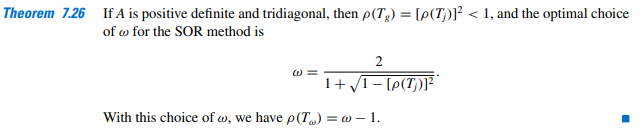

In [ ]:
omega = 2/(1+math.sqrt(1)) # el radio espectral es 0

In [ ]:
x0 =  np.array([1,1,-1])
SOR(3,A,b,x0,0.1,10**-3,47)

0 [ 1  1 -1]
1 [ 1.2    1.08  -0.856]
2 [ 1.3928    1.11832  -0.772624]
3 [ 1.5753312   1.12621728 -0.7356713 ]
4 [ 1.74542036  1.11262065 -0.73371237]
5 [ 1.90161173  1.08456864 -0.75757721]
6 [ 2.04302138  1.04756736 -0.79993723]
7 [ 2.16921833  1.00588252 -0.85496368]
8 [ 2.28012725  0.96277791 -0.91804834]
9 [ 2.37594928  0.92071002 -0.98557537]
10 [ 2.45709727  0.88148683 -1.05473465]
11 [ 2.52414325  0.84639729 -1.1233693 ]
12 [ 2.57777561  0.81631693 -1.18985087]
13 [ 2.61876448  0.79179387 -1.25297746]
14 [ 2.64793377  0.77311886 -1.31189024]
15 [ 2.66613857  0.76038214 -1.36600536]
16 [ 2.67424722  0.75351974 -1.41495821]
17 [ 2.67312691  0.75235089 -1.45855795]
18 [ 2.66363245  0.75660835 -1.49675032]
19 [ 2.64659747  0.7659628  -1.52958734]
20 [ 2.62282769  0.78004249 -1.55720264]
21 [ 2.5930959   0.79844891 -1.57979134]
22 [ 2.55813826  0.82076933 -1.59759372]
23 [ 2.51865182  0.84658659 -1.61088203]
24 [ 2.47529292  0.87548684 -1.61994978]
25 [ 2.4286763   0.9070655  -1.62

In [ ]:
SOR(3,A,b,x0,0.2,10**-3,47)

0 [ 1  1 -1]
1 [ 1.4    1.12  -0.808]
2 [ 1.7488    1.10784  -0.789056]
3 [ 2.0402816   1.03602688 -0.86176819]
4 [ 2.27310725  0.94655369 -0.97727893]
5 [ 2.44895275  0.86290819 -1.10656752]
6 [ 2.57137192  0.79736567 -1.23274905]
7 [ 2.64505164  0.75543202 -1.34639271]
8 [ 2.67531142  0.73856187 -1.44266348]
9 [ 2.667759    0.7458304  -1.51956654]
10 [ 2.62804842  0.77496794 -1.57685978]
11 [ 2.56170765  0.82300478 -1.6153728 ]
12 [ 2.47401509  0.88667537 -1.63657442]
13 [ 2.36991216  0.96267274 -1.64229349]
14 [ 2.25394323  1.04780825 -1.63453539]
15 [ 2.13021713  1.13911025 -1.61535926]
16 [ 2.0023859   1.23388287 -1.58679492]
17 [ 1.8736376   1.32973776 -1.55078608]
18 [ 1.74670055  1.42460732 -1.50915201]
19 [ 1.62385671  1.51674491 -1.46356226]
20 [ 1.5069625   1.60471588 -1.41552116]
21 [ 1.39747518  1.6873819  -1.36635976]
22 [ 1.29648348  1.76388077 -1.31723351]
23 [ 1.20474107  1.83360311 -1.26912448]
24 [ 1.12270182  1.89616702 -1.22284712]
25 [ 1.0505558   1.95139188 -1.17

In [ ]:
SOR(3,A,b,x0,0.4,10**-3,47)

0 [ 1  1 -1]
1 [ 1.8    1.08  -0.904]
2 [ 2.2928    0.89248  -1.090624]
3 [ 2.5891968   0.73605888 -1.31457894]
4 [ 2.71300782  0.68226378 -1.50496464]
5 [ 2.67802195  0.74013534 -1.63750462]
6 [ 2.5047012   0.89720258 -1.70402579]
7 [ 2.22183802  1.13119665 -1.70484322]
8 [ 1.86427092  1.41494691 -1.64628019]
9 [ 1.46958086  1.71964788 -1.53915111]
10 [ 1.07470932  2.01756544 -1.39731048]
11 [ 0.71292485  2.28429352 -1.23616099]
12 [ 0.41139131  2.50048398 -1.07119682]
13 [ 0.18949014  2.65297306 -0.91668866]
14 [ 0.05796471  2.73527341 -0.7846037 ]
15 [ 0.01887714  2.74745467 -0.68382767]
16 [ 0.06630041  2.6954837  -0.61972389]
17 [ 0.18761417  2.59013411 -0.59403296]
18 [ 0.36523485  2.44559971 -0.60508742]
19 [ 0.5785912   2.27795832 -0.64829207]
20 [ 0.80615441  2.10363005 -0.71680281]
21 [ 1.02734636  1.93796061 -0.80232726]
22 [ 1.22417751  1.79403627 -0.89596738]
23 [ 1.38250359  1.68180728 -0.98902912]
24 [ 1.49283303  1.6075628  -1.07373414]
25 [ 1.55066226  1.57376643 -1.14

In [ ]:
SOR(3,A,b,x0,1,10**-3,47)

0 [ 1  1 -1]
1 [ 3.  0. -1.]
2 [ 5. -2. -1.]
3 [ 9. -6. -1.]
4 [ 17. -14.  -1.]
5 [ 33. -30.  -1.]
6 [ 65. -62.  -1.]
7 [ 129. -126.   -1.]
8 [ 257. -254.   -1.]
9 [ 513. -510.   -1.]
10 [ 1.025e+03 -1.022e+03 -1.000e+00]
11 [ 2.049e+03 -2.046e+03 -1.000e+00]
12 [ 4.097e+03 -4.094e+03 -1.000e+00]
13 [ 8.193e+03 -8.190e+03 -1.000e+00]
14 [ 1.6385e+04 -1.6382e+04 -1.0000e+00]
15 [ 3.2769e+04 -3.2766e+04 -1.0000e+00]
16 [ 6.5537e+04 -6.5534e+04 -1.0000e+00]
17 [ 1.31073e+05 -1.31070e+05 -1.00000e+00]
18 [ 2.62145e+05 -2.62142e+05 -1.00000e+00]
19 [ 5.24289e+05 -5.24286e+05 -1.00000e+00]
20 [ 1.048577e+06 -1.048574e+06 -1.000000e+00]
21 [ 2.097153e+06 -2.097150e+06 -1.000000e+00]
22 [ 4.194305e+06 -4.194302e+06 -1.000000e+00]
23 [ 8.388609e+06 -8.388606e+06 -1.000000e+00]
24 [ 1.6777217e+07 -1.6777214e+07 -1.0000000e+00]
25 [ 3.3554433e+07 -3.3554430e+07 -1.0000000e+00]
26 [ 6.7108865e+07 -6.7108862e+07 -1.0000000e+00]
27 [ 1.34217729e+08 -1.34217726e+08 -1.00000000e+00]
28 [ 2.68435457e+0

Se llega a una solución aproximada [ 0.95709942  2.03393744 -0.95748781] 'decente' con omega = 0.2, a pesar de que la omega conveniente es 1; debe haber algún error de cálculo.


#Segundo parcial

## Problema 1

1. Aproxima la derivada de la siguiente función y muestra las gráficas de la aproximación y la de la derivada obtenida mediante alguna CAS
\begin{align*}
    f(x) = \frac{(x-5)(x-6) \sqrt{x}}{x-7} + \ln(8x).
\end{align*}



**Respuesta:**

Se obtiene una aproximación a la derivada mediante Geogebra:

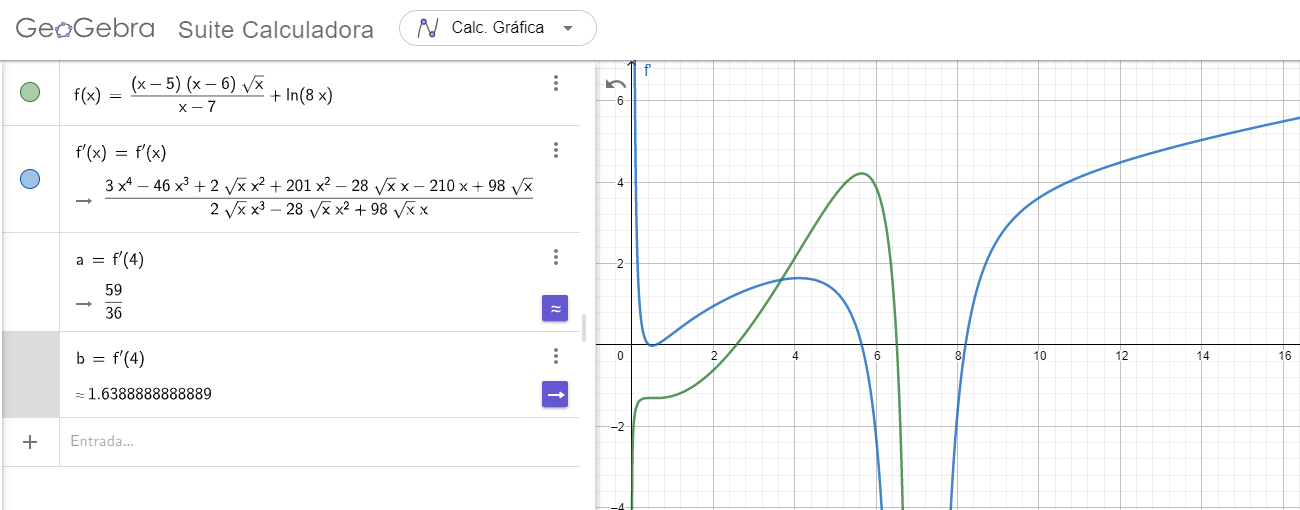

Notemos que el dominio de $f$ está dado en $(0,\infty) \setminus \{7\}$, por lo que se procurará no evaluar en dicho punto.

Para aproximar la derivada puede realizarse con distintos métodos:


*   Fórmulas de diferencia hacia atrás
*   Fórmulas de diferencia hacia delante
*   Fórmulas de diferencias centradas

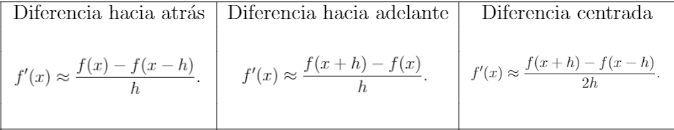

*   Fórmulas de $n+1$ puntos: Fórmula del punto medio ;  Fórmula del punto final



De las fórmulas de 3 puntos: 


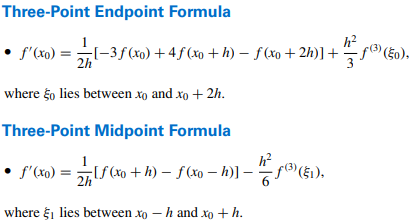

De las fórmulas de 5 puntos:

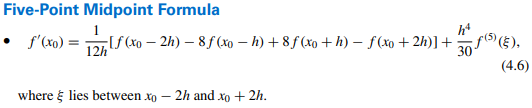


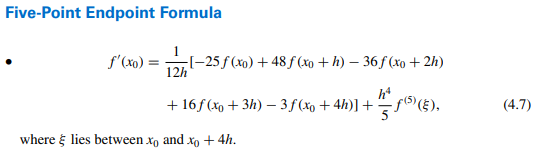

In [ ]:
# correr esta celda nos da como resultado la tabla que se presenta después
def f(x): # función dada
  return ((x-5)*(x-6)*math.sqrt(x))/(x-7) + math.log(8*x)

def backward_difference(x):
  return (f(x) - f(x-h))/h

def forward_difference(x):
  return (f(x+h) - f(x))/h

def centered_difference(x): #pag 206
  return (f(x+h) - f(x-h))/(2*h)

# Aproximación con fórmula 
N_its = 15
x = 4 # se busca aproximar la derivada en 4

print('|h | backward | forward | centered')
print('|-----|-----|-----|-----|')
for j in range(N_its):
  h = 10**(-1-j)
  print('| $10^ {-', j+1 ,'}$ |', backward_difference(x) ,'|' ,forward_difference(x) ,'|', centered_difference(x))

|h | backward | forward | centered
|-----|-----|-----|-----|
| $10^ {- 1 }$ | 1.6356011304720708 | 1.6406522142193314 | 1.638126672345701
| $10^ {- 2 }$ | 1.638626665139764 | 1.6391358829378255 | 1.6388812740387948
| $10^ {- 3 }$ | 1.6388633497985694 | 1.6389142756843 | 1.6388888127414347
| $10^ {- 4 }$ | 1.638886341828183 | 1.638891434421197 | 1.63888888812469
| $10^ {- 5 }$ | 1.6388886342255657 | 1.6388891434182538 | 1.6388888888219098
| $10^ {- 6 }$ | 1.6388888637308696 | 1.6388889148011287 | 1.6388888892659992
| $10^ {- 7 }$ | 1.6388888823826164 | 1.6388889001461848 | 1.6388888912644006
| $10^ {- 8 }$ | 1.6388888468554796 | 1.6388889356733216 | 1.6388888912644006
| $10^ {- 9 }$ | 1.6388890244911636 | 1.6388890244911636 | 1.6388890244911636
| $10^ {- 10 }$ | 1.638884583599065 | 1.638893465383262 | 1.6388890244911636
| $10^ {- 11 }$ | 1.638866820030671 | 1.638955637872641 | 1.638911228951656
| $10^ {- 12 }$ | 1.638689184346731 | 1.6391332735565811 | 1.638911228951656
| $10^ {- 13 }$ 

Dado que buscamos una buena aproximación a la derivada, nos conviene utilizar $h$'s pequeñas, iniciamos con $h_0 = 10^{-1} $.

Se obtiene la siguiente tabla

|h | hacia atrás | hacia adelante | centradas
|-----|-----|-----|-----|
| $10^ {- 1 }$ | 1.6356011304720708 | 1.6406522142193314 | 1.638126672345701
| $10^ {- 2 }$ | 1.638626665139764 | 1.6391358829378255 | 1.6388812740387948
| $10^ {- 3 }$ | 1.6388633497985694 | 1.6389142756843 | 1.6388888127414347
| $10^ {- 4 }$ | 1.638886341828183 | 1.638891434421197 | 1.63888888812469
| $10^ {- 5 }$ | 1.6388886342255657 | 1.6388891434182538 | **1.6388888888219098**
| $10^ {- 6 }$ | 1.6388888637308696 | 1.6388889148011287 | 1.6388888892659992
| $10^ {- 7 }$ | **1.6388888823826164** | **1.6388889001461848** | 1.6388888912644006
| $10^ {- 8 }$ | 1.6388888468554796 | 1.6388889356733216 | 1.6388888912644006
| $10^ {- 9 }$ | 1.6388890244911636 | 1.6388890244911636 | 1.6388890244911636
| $10^ {- 10 }$ | 1.638884583599065 | 1.638893465383262 | 1.6388890244911636
| $10^ {- 11 }$ | 1.638866820030671 | 1.638955637872641 | 1.638911228951656
| $10^ {- 12 }$ | 1.638689184346731 | 1.6391332735565811 | 1.638911228951656
| $10^ {- 13 }$ | 1.6342482922482304 | 1.652011860642233 | 1.6431300764452317
| $10^ {- 14 }$ | 1.687538997430238 | 1.6431300764452317 | 1.6653345369377348
| $10^ {- 15 }$ | 0.8881784197001251 | 1.7763568394002502 | 1.3322676295501878

Para la diferencia hacia atrás, $h = 10^{-7} $ da una aproximación más precisa.

Para la diferencia hacia adelante, $h = 10^{-7} $ da una aproximación más precisa.

Para la diferencia centrada, $h = 10^{-5} $ da una aproximación más precisa.

In [ ]:
# Para las fórmulas de 3 puntos:

def endpoint_3(x):
  return (1/(2*h))* (-3*f(x) + 4*f(x+h) - f(x+2*h) )

def midpoint_3(x):
  return (f(x+h) - f(x-h))/(2*h)

# Aproximación con fórmula 
N_its = 15
x = 4 # se busca aproximar la derivada en 4

print('|h | Endpoint | Midpoint ')
print('|-----|-----|-----|')
for j in range(N_its):
  h = 10**(-1-j)
  print('| $10^ {-', j+1 ,'}$ |', midpoint_3(x) ,'|' , endpoint_3(x))

|h | Endpoint | Midpoint 
|-----|-----|-----|
| $10^ {- 1 }$ | 1.638126672345701 | 1.6405473348469135
| $10^ {- 2 }$ | 1.6388812740387948 | 1.6389042438640145
| $10^ {- 3 }$ | 1.6388888127414347 | 1.6388890413110424
| $10^ {- 4 }$ | 1.63888888812469 | 1.6388888904028676
| $10^ {- 5 }$ | 1.6388888888219098 | 1.638888888688683
| $10^ {- 6 }$ | 1.6388888892659992 | 1.6388888894880438
| $10^ {- 7 }$ | 1.6388888912644006 | 1.638888906807523
| $10^ {- 8 }$ | 1.6388888912644006 | 1.6388889800822426
| $10^ {- 9 }$ | 1.6388890244911636 | 1.6388890244911634
| $10^ {- 10 }$ | 1.6388890244911636 | 1.6388979062753606
| $10^ {- 11 }$ | 1.638911228951656 | 1.639000046793626
| $10^ {- 12 }$ | 1.638911228951656 | 1.6391332735565811
| $10^ {- 13 }$ | 1.6431300764452317 | 1.6653345369377348
| $10^ {- 14 }$ | 1.6653345369377348 | 1.5987211554602254
| $10^ {- 15 }$ | 1.3322676295501878 | 1.9984014443252816


|h | Endpoint | Midpoint 
|-----|-----|-----|
| $10^ {- 1 }$ | 1.638126672345701 | 1.6405473348469135
| $10^ {- 2 }$ | 1.6388812740387948 | 1.6389042438640145
| $10^ {- 3 }$ | 1.6388888127414347 | 1.6388890413110424
| $10^ {- 4 }$ | 1.63888888812469 | 1.6388888904028676
| $10^ {- 5 }$ | **1.6388888888219098** | **1.638888888688683**
| $10^ {- 6 }$ | 1.6388888892659992 | 1.6388888894880438
| $10^ {- 7 }$ | 1.6388888912644006 | 1.638888906807523
| $10^ {- 8 }$ | 1.6388888912644006 | 1.6388889800822426
| $10^ {- 9 }$ | 1.6388890244911636 | 1.6388890244911634
| $10^ {- 10 }$ | 1.6388890244911636 | 1.6388979062753606
| $10^ {- 11 }$ | 1.638911228951656 | 1.639000046793626
| $10^ {- 12 }$ | 1.638911228951656 | 1.6391332735565811
| $10^ {- 13 }$ | 1.6431300764452317 | 1.6653345369377348
| $10^ {- 14 }$ | 1.6653345369377348 | 1.5987211554602254
| $10^ {- 15 }$ | 1.3322676295501878 | 1.9984014443252816

Para las fórmulas de 3 puntos, notemos que $h = 10^{-5}$ nos da una mejor aproximación para ambos casos.

In [ ]:
def endpoint_5(x):
  return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)

def midpoint_5(x):
  return (-25*f(x) + 48*f(x+h) - 36*f(x+2*h) + 16*f(x+3*h) - 3*f(x+4*h))/(12*h)

# Aproximación con fórmula 
N_its = 15
x = 4 # se busca aproximar la derivada en 4

print('|h | Endpoint | Midpoint ')
print('|-----|-----|-----|')
for j in range(N_its):
  h = 10**(-1-j)
  print('| $10^ {-', j+1 ,'}$ |', midpoint_5(x) ,'|' , endpoint_5(x))

|h | Endpoint | Midpoint 
|-----|-----|-----|
| $10^ {- 1 }$ | 1.6389139037282043 | 1.6388918575725633
| $10^ {- 2 }$ | 1.6388888907192811 | 1.6388888891840907
| $10^ {- 3 }$ | 1.6388888888955548 | 1.6388888888893376
| $10^ {- 4 }$ | 1.6388888888603976 | 1.6388888888855626
| $10^ {- 5 }$ | 1.638888888214988 | 1.6388888888071067
| $10^ {- 6 }$ | 1.6388888914124302 | 1.638888889340014
| $10^ {- 7 }$ | 1.6388889238309428 | 1.6388888923746237
| $10^ {- 8 }$ | 1.638889039294137 | 1.6388888986658872
| $10^ {- 9 }$ | 1.63888961661011 | 1.6388890244911634
| $10^ {- 10 }$ | 1.6389156698437546 | 1.6388897646398466
| $10^ {- 11 }$ | 1.6390814631487653 | 1.6389186304384868
| $10^ {- 12 }$ | 1.6376529761904142 | 1.638911228951656
| $10^ {- 13 }$ | 1.7008616737257396 | 1.6453505224944818
| $10^ {- 14 }$ | 1.4358884451818692 | 1.6727360237685693
| $10^ {- 15 }$ | 2.146431180941969 | 1.2212453270876722


|h | Endpoint | Midpoint 
|-----|-----|-----|
| $10^ {- 1 }$ | 1.6389139037282043 | 1.6388918575725633
| $10^ {- 2 }$ | 1.6388888907192811 | 1.6388888891840907
| $10^ {- 3 }$ | **1.6388888888955548** | **1.6388888888893376**
| $10^ {- 4 }$ | 1.6388888888603976 | 1.6388888888855626
| $10^ {- 5 }$ | 1.638888888214988 | 1.6388888888071067
| $10^ {- 6 }$ | 1.6388888914124302 | 1.638888889340014
| $10^ {- 7 }$ | 1.6388889238309428 | 1.6388888923746237
| $10^ {- 8 }$ | 1.638889039294137 | 1.6388888986658872
| $10^ {- 9 }$ | 1.63888961661011 | 1.6388890244911634
| $10^ {- 10 }$ | 1.6389156698437546 | 1.6388897646398466
| $10^ {- 11 }$ | 1.6390814631487653 | 1.6389186304384868
| $10^ {- 12 }$ | 1.6376529761904142 | 1.638911228951656
| $10^ {- 13 }$ | 1.7008616737257396 | 1.6453505224944818
| $10^ {- 14 }$ | 1.4358884451818692 | 1.6727360237685693
| $10^ {- 15 }$ | 2.146431180941969 | 1.2212453270876722

Para las fórmulas de 5 puntos, notemos que $h = 10^{-3}$ nos da una mejor aproximación para ambos casos.

Dados los errores para cada fórmula, notemos que es conveniente utilizar alguna de las fórmulas de 5 puntos con $h=10^{-3}$. Para gráficar la derivada obtenida mediante geogebra y aproximaciones obtenidas puntualmente (como se mencionó anteriormente):

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


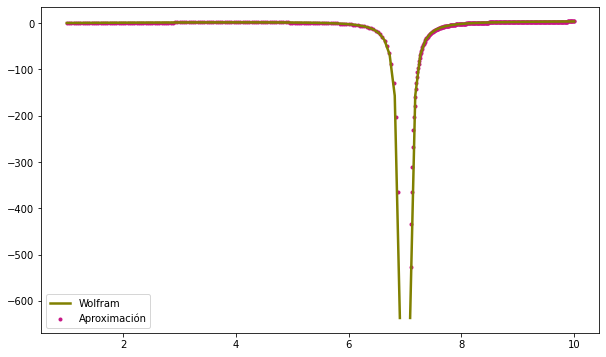

In [ ]:
h = 10**-3
p = 0.04
x = 1
a = [] ; b = []
while x <= 6.9:
  a.append(x)
  b.append((1/(12*h))*(f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)))
  x = x + p

x = 7.1
p = 0.01

while x <= 10:
  if x == 7:
    continue
  a.append(x)
  b.append(endpoint_5(x))
  x = x + p

def df(x):
    return (3*x**3.5 - 46*x**2.5 + 201*x**1.5 + 2*x**2 -28*x - 210*x**0.5 + 98)/(2*(x-7)**2*x)

plt.figure(figsize=(10,6))
r=np.linspace(1,10,100)
plt.scatter(a,b,marker = '.', color = 'mediumvioletred')
plt.plot(r,df(r), color = "olive", linewidth=2.5)
plt.legend(['Wolfram','Aproximación'])

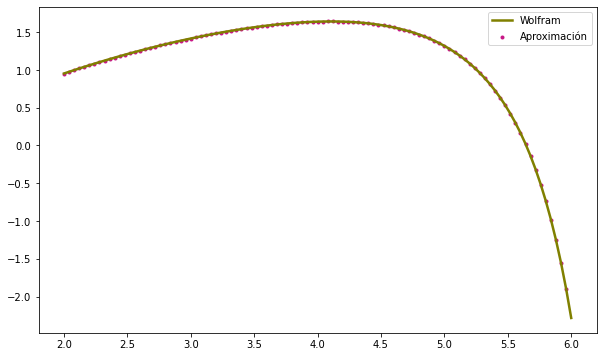

In [ ]:
h = 10**-3
p = 0.04
x = 2
a = [] ; b = []

while x <= 6:
  a.append(x)
  b.append((1/(12*h))*(f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h)))
  x = x + p

plt.figure(figsize=(10,6))
r=np.linspace(2,6,100)
plt.scatter(a,b,marker = '.', color = 'mediumvioletred')
plt.plot(r,df(r), color = "olive", linewidth=2.5)
plt.legend(['Wolfram','Aproximación'])

## Problema 2

2. En un circuito eléctrico con un voltaje impreso $\varepsilon(t)$ y una inductancia $L$, la primera ley de Kirchhoff nos da la siguiente relación
\begin{align*}
    L \frac{di}{dt} + Ri = \varepsilon(t)
\end{align*}
donde $R$ es la resistencia del circuito e $i$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos

| | | | | | |
| ----- | --- | ----- | ---- | ---  | ---- |
|$t$    | 1.00| 1.01  | 1.02 | 1.03 | 1.04 |
|$i$ | 3.10 | 3.12 | 3.14 | 3.18 | 3.24 |
| | | | | | |


donde $t$ se mide en segundos, $i$ se da en amperes, la inductancia $L$ es una constante $0.098$ henries y la resistencia es de $0.142$ ohms. 

Aproxime el voltaje $\varepsilon(t)$ en los valores $t=1,1.01,1.02,1.03,1.04$.

**Solución:** Notemos que no podemos aplicar la misma fórmula a todos los valores de $t$: 
* Para $t = 1.0$ podemos utilizar la fórmula de diferencias hacia adelante o bien, la fórmula de 3 puntos (end-point)
* Para $t = 1.01,1.02,1.03$ podemos utilizar diferencias centradas, diferencias hacia adelante o bien, de las fórmulas de 3 puntos, la fórmula del punto medio (midpoint)
* Para $t=1.04$ sólo podríamos utilizar la fórmula de diferencias hacia atrás.

Utilizar las fórmulas de diferencias puede ser poco ventajoso pues, como hemos observado, algunos valores de $h$ (paso) nos dan buenas aproximaciones, mientras que otros valores no. En este caso tenemos un tamaño de paso fijo $h=0.01$ (esto por los nodos dados).


Siendo así que, he decidido que es más conveniente lo siguiente: para $t=1.0$ y para $t=1.01, 1.02, 1.03$ utilizaré fórmulas de 3 puntos, endpoint y midpoint respectivamente, mientras que para $t=1.04$ utilizaré la fórmula de diferencias hacia atrás.

In [ ]:
x = [1.00, 1.01, 1.02, 1.03, 1.04] ; y = [3.1,3.12,3.14,3.18,3.24]
#for j in range(5):
 # x.append(j*0.01 + 1)
def f(x0):
  if x0 == 0.99:
    return y[0]
  return y[x.index(x0)]

L = 0.098
R = 0.142

def epsilon(t):
  if t == 1.0:
    d = endpoint_3(t)
  if t < 1.04:
    d = midpoint_3(t)
  else:
    h = 0.01
    d = backward_difference(t)
  return L*d + R 

h = 0.01
print('| t   | 1.00 | 1.01 | 1.02 | 1.03 | 1.04 |')
print('|-----|------|------|------|------|------|')
print('|epsilon(t)' , round(epsilon(x[0]),3),
      '|' , round(epsilon(x[1]),3),
      '|' , round(epsilon(x[2]),3),
      '|' , round(epsilon(x[3]),3),
      '|' , round(epsilon(x[4]),3) , '|')

| t   | 1.00 | 1.01 | 1.02 | 1.03 | 1.04 |
|-----|------|------|------|------|------|
|epsilon(t) 0.24 | 0.338 | 0.436 | 0.632 | 0.73 |


Se obtienen las aproximaciones a la derivada $di/dt$ y dadas las constantes $L = 0.098 $ (inductancia) y $R = 0.142 $ (resistencia), se obtienen las siguientes aproximaciones para el voltaje ɛ(t) dada la primera ley de Kirchhoff:


| t   | 1.00 | 1.01 | 1.02 | 1.03 | 1.04 |
|-----|------|------|------|------|------|
| ɛ(t) |  0.24 | 0.338 | 0.436 | 0.632 | 0.73 |

## Problema 3

3. Dada la matriz 
\begin{align*}
    A = \begin{pmatrix}
    0 & 11 & -5\\
    -2 & 17 & -7 \\
    -4 & 26 & -10
    \end{pmatrix}.
\end{align*}
se sabe que tiene un autovalor cercano a $0.5$. Implementa el método de la potencia inversa para obtener este autovalor de $A$ y su correspondiente autovector.

In [ ]:
def find_p(x): 
  n = len(x) ; p = n
  for i in range(n):
    if abs(x[i] ) == np.linalg.norm(x, np.inf) and i < p:
      p = i
  return p
  
def inverse_power_method(A, x , tol, N, q):
    #q = (np.transpose(x) @ A @ x)/(np.transpose(x) @ x) #para hallar el dominante
    k = 1 ; n = len(A) ;  I = np.eye(n) #identidad n x n   
    p = find_p(x)
    x = x / x[p]   
    mu = -1/q ; y = 0
    
    while k <= N:  
        y = np.linalg.solve(A - q * I, x)    #If the system does not have a unique solution, then
                                             #return(‘q is an eigenvalue’, q);
        print(k,x, mu  )
        mu = y[p]
        p = find_p(y) 

        error = np.linalg.norm(x - y/y[p], np.inf)
        x = y / y[p]

        mu = 1. / mu + q 

        if error < tol:
            print('Tolerancia alcanzada en',k,'iteraciones')
            print('Eigenvalor dominante aproximado',mu)
            print('Eigenvector unitario asociado',x)
            return mu,x
        k = k + 1
    print('Tolerancia no alcanzada en el max de iteraciones')
    return

In [ ]:
A = np.array([ [0,11,-5],
             [-2,17,-7],
             [-4,26,-10]] )

x = np.array([1,1,1])
tol = 10**-8
N = 100
q = 0.5
print('Iteraciones del método de la potencia inversa')
eig_inv = inverse_power_method(A,x,tol,N, q)

Iteraciones del método de la potencia inversa
1 [1. 1. 1.] -2.0
2 [0.07692308 0.38461538 1.        ] -10.000000000000185
3 [0.20529801 0.47019868 1.        ] 1.40397350993378
4 [0.23362975 0.4890865  1.        ] 1.781729991915949
5 [0.24339602 0.49559735 1.        ] 1.9119469507555957
6 [0.24723918 0.49815945 1.        ] 1.9631890688200164
7 [0.24882911 0.4992194  1.        ] 1.98438808354696
8 [0.24950042 0.49966694 1.        ] 1.9933388908589713
9 [0.2497863  0.49985753 1.        ] 1.9971506617317982
10 [0.24990849 0.49993899 1.        ] 1.9987798483660995
11 [0.24996079 0.49997386 1.        ] 1.9994772601564739
12 [0.2499832 0.4999888 1.       ] 1.9997760022448852
13 [0.2499928 0.4999952 1.       ] 1.999904007559664
14 [0.24999691 0.49999794 1.        ] 1.9999588628732579
15 [0.24999868 0.49999912 1.        ] 1.999982374096844
16 [0.24999943 0.49999962 1.        ] 1.9999924583399884
17 [0.24999975 0.49999984 1.        ] 1.9999968046483094
18 [0.24999986 0.49999993 1.        ] 1.9999

Se ha encontrado que el autovalor cercano a 0.5 es λ $\approx 0.9999999622717695 $ y su correspondiente autovector aproximado es [0.5 0.5 1. ] (o bien, un múltiplo del autovector asociado exacto).

## Problema 4

4. Mediante un algoritmo computacional determina los valores propios de la matriz:
\begin{align*}
    \begin{bmatrix}
        5 & -2 & 2 & -4 \\
        7 & -4 & 2 & -4 \\
        4 & -4 & 2 & 0\\
        3 & -1 & 1 & -3
    \end{bmatrix}.
\end{align*}
¿Qué tan confiable es tu aproximación del espectro?

In [ ]:
A = np.array([[5 , -2 ,2 , -4],
              [7,-4,2,-4],
              [4,-4,2,0],
              [3,-1,1,-3]])

In [ ]:
def find_p(x):
  n = len(x) ; p = n
  for j in range(n):
    if abs(x[j]) == np.linalg.norm(x,np.inf) and j < p:
      p = j
  return p
  
def power_method(A,x,tol,N): #burden
  n = len(A)
  k = 1
  p = find_p(x)
  
  print(0,x,'-') # primera iteración

  x = x / x[p]


  while k <= N:
    y = A @ x
    mu = y[p]
    print(k,x,mu)
    
    p = find_p(y)

    if y[p] == 0:
      print('Eigenvector',x)
      print('Eigenvalor',0,' Escoge un nuevo vector inicial')
      return (x,0)
    
    error = np.linalg.norm(x-y/y[p], np.inf)
    x = y/y[p]

    if error < tol:
      print('\nTolerancia alcanzada en ',k,'iteraciones')
      print('Eigenvalor:',mu)
      print('Eigenvector:',x)
      return(mu,x)
    
    k = k + 1

  print('Tolerancia no alcanzada')
  return ('FALLA', 'FALLA')


def encuentra_i(v):
  n = len(v)-1 ; i = n+1
  for j in range(n):
    if abs(v[j]) == max(abs(v)) and j < i:
      i = j
  return i





def wielantDeflation(A,lambda_1,v,x,tol,N):
  n = len(A) 
  i = encuentra_i(v)
  
  b = np.zeros((n-1,n-1))
  w = np.zeros(n-1)
  u = np.ones(n)
  if i != 0 :
    for k in range(0,i): #//
      for j in range(0,i): #//
        b[k,j] = A[k][j] - (v[k]/v[i]) * A[i][j]
  if i != 0 and i != n-1:
    for k in range(i,n-1): #//
      for j in range(0,i): #//
        b[k,j] = A[k+1][j] - (v[k+1]/v[i]) * A[i][j]
        b[j,k] = A[j][k+1] - (v[j]/v[i])*A[i][k+1]
  if i != n-1:
    for k in range(i,n-1): #//
      for j in range(i,n-1): #//
        b[k,j] = A[k+1][j+1] - (v[k+1]/v[i]) * A[i][j+1]
  
  print(b)
  print('\nINICIO POWER METHOD ----------------------\n')
  mu,w1 = power_method(b,x,tol,N)
  print('\nFIN POWER METHOD ----------------------\n')
  
  if mu == 'FALLA':
    print('Metodo fallido\n')
    return

  if i != 0:
    for k in range(0,i-1):
      w[k] = w1[k]

  w[i] = 0

  if i != n:
    for k in range(i,n-1): #
      w[k] = w1[k-1]

  suma = 0
  for j in range(0,n-1):
    suma = suma + A[i][j]*w[j]
  
  for k in range(0,n-1):
    u[k] = (mu-lambda_1)*w[k] + suma * v[k]/v[i]
    #u[k] = (mu-complex(lambda_1,0))*complex(w[k],0) + complex(suma * v[k]/v[i],0)
    #print(k,(mu-complex(lambda_1,0))*complex(w[k],0)+ complex(suma * v[k]/v[i],0))

  #print('Deflación - correcto')
  print(mu, u, '\n')
  return mu,u

In [ ]:
# encontrar el eigenvalor dominante:
inicial = np.array([1,1,1,1])
l = power_method(A,inicial, 10**-2 , 100)
print('El eigenvalor dominante es (aprox)', l[0])

0 [1 1 1 1] -
1 [1. 1. 1. 1.] 1.0
2 [0.5 0.5 1.  0. ] 2.0
3 [1.         1.         0.57142857 0.57142857] 1.8571428571428568
4 [1.         1.         0.61538462 0.46153846] 2.384615384615384
5 [1.         1.         0.51612903 0.51612903] 1.96774193548387
6 [1.         1.         0.52459016 0.49180328] 2.0819672131147544
7 [1.         1.         0.50393701 0.50393701] 1.9921259842519667

Tolerancia alcanzada en  7 iteraciones
Eigenvalor: 1.9921259842519667
Eigenvector: [1.         1.         0.50592885 0.49802372]
El eigenvalor dominante es (aprox) 1.9921259842519667


In [ ]:
inicial2 = np.array([1,1,1])
l2 = wielantDeflation(A, l[0], l[1], inicial2 , 10**-2 , 100 )

[[-2.          0.          0.        ]
 [-2.98814229  0.98814229  2.02371542]
 [-0.00395257  0.00395257 -1.00790514]]

INICIO POWER METHOD ----------------------

0 [1 1 1] -
1 [1. 1. 1.] -2.0
2 [ 1.         -0.01185771  0.50395257] -2.0
3 [1.         0.99000141 0.25596791] -2.0
4 [1.         0.74593691 0.12901545] -2.0
5 [1.         0.99497997 0.06551977] -2.0
6 [1.         0.93618357 0.03302878] -2.0
7 [1.         0.99810943 0.01677106] -2.0
8 [1.         0.98396415 0.00845555] -2.0
9 [1.         0.99936703 0.00429289] -2.0

Tolerancia alcanzada en  9 iteraciones
Eigenvalor: -2.0
Eigenvector: [1.         0.99596894 0.00216466]

FIN POWER METHOD ----------------------

-2.0 [-0.00588042 -3.98936479 -3.97463651  1.        ] 



In [ ]:
# igual que lo anterior, se ejecuta esta celda y la siguiente
b = np.array([[-2., 0.,0. ],
 [-2.98814229 , 0.98814229 , 2.02371542],
 [-0.00395257 , 0.00395257 , -1.00790514]])

inicial3 = np.array([1,1])

l3 = wielantDeflation(b, l2[0] , l2[1] , inicial3 , 10**-2,50)

[[-1.99559541e+00 -2.98300368e-03]
 [ 2.97315784e+00 -3.02414923e+00]]

INICIO POWER METHOD ----------------------

0 [1 1] -
1 [1. 1.] -1.9985784123253216
2 [1.         0.02551383] -1.9956715165057237
3 [-0.68911305  1.        ] -5.072991082411591
4 [-0.27049285  1.        ] -3.828367174046922
5 [-0.14021938  1.        ] -3.44104359426911
6 [-0.0804518  1.       ] -3.26334513627253
7 [-0.04828366  1.        ] -3.167704169570356
8 [-0.02947612  1.        ] -3.1117864034144223
9 [-0.01794449  1.        ] -3.077501028809006

Tolerancia alcanzada en  9 iteraciones
Eigenvalor: -3.077501028809006
Eigenvector: [-0.01066675  1.        ]

FIN POWER METHOD ----------------------

-3.077501028809006 [-1.55365994e-05  9.53167367e-04  1.00000000e+00] 



In [ ]:
b = np.array([[-1.99397759, -0.00407867],
 [ 2.96919311, -3.02146413]])

inicial4 = np.array([1])

wielantDeflation(b, l3[0] , l3[1] , inicial4 , 10**-2,50)

Con el método de deflación, se obtiene entonces que los eigenvalores de la matriz dada son, aproximadamente⁉

$\lambda_1 \approx 2$

$\lambda_2 \approx -2$

$\lambda_3 \approx -1.000007750102880$

$\lambda_4 \approx 1.00000000e+00$


Sabemos que el método de la potencia y el de deflación convergen, de modo que se calcula un error y se le asigna una tolerancia para establecer la condición de paro. A cada ejecución de dichos métodos asigné una tolerancia de $10^{-2}$.

## Problema 5

5. (a) Suponga que se te pide aproximar el valor de la siguiente integral. ¿Qué método sería
apropiado usar? Jutifica la elección. Hint: Puede que se tenga que reescribir el argumento de la integral.

\begin{align*}
    I = \int_{10^{-6}}^1 \frac{e^{-x}}{x} dx
\end{align*}

Sólo comente la elección del método, no realice más.


(b) Utiliza las fórmulas de Newton compuestas: Trapecio y Simpson para aproximar el valor de la
siguiente integral

\begin{align*}
    I_1 = \int_0 ^{2\pi} e^{\sin (2x)} dx.
\end{align*}

**Solución:** (a) El dominio de la función está dado por $\mathbb{R} \setminus \{0\} $.

Notemos que la función, en el intervalo a evaluar, crece/decrece rápido en valores cercanos a 0. 

Para elegir un método adecuado, debemos considerar métodos que no utilicen los valores de la función en puntos cercanos al 0 o que incluso evaluen la función en 0: Se debe utilizar una fórmula abierta

Podríamos entonces utilizar la fórmula del punto medio (abierta) para algún $n \in \mathbb{N}$ (la normal tanto como la compuesta).



(b)

In [ ]:
# inciso b)
a = 0
b = 2*math.pi
n = 10
def f(x):
  return math.exp(math.sin(2*x))

In [ ]:
def regla_simpson_compuesta(a,b,n,f):
  if n == 0:
    return 0
  h = (b-a)/n
  XI0 = f(a) + f(b)
  XI1 = 0
  XI2 = 0

  for i in range(1,n):
    X = a + i*h
    if i % 2 == 0:
      XI2 = XI2 + f(X)
    else:
      XI1 = XI1 + f(X)
    
  XI = h*(XI0 + 2*XI2 + 4*XI1)/3

  return XI

def regla_trapecio_compuesta(a,b,n,f):
  if n == 0:
    return 0
  h = (b-a)/n
  suma = 0

  for i in range(1,n):
    x = a + i*h
    suma = suma + f(x)
    
  XI = h/2 * (f(a) + f(b) + 2 * suma) 

  return XI

In [ ]:
regla_simpson_compuesta(a,b,n,f)

7.954926517553389

In [ ]:
regla_trapecio_compuesta(a,b,n,f)

7.954926517553388

## Problema 6

6. Aproxima el valor de la siguiente integral utiliza al menos 2 métodos. Justifica los
métodos elegidos. Sugerencia: Realiza un cambio de variable adecuado.

\begin{align*}
    \int_0^1 \frac{2x+1}{\sqrt{x(1-x)}} dx
\end{align*}
Respecto a los métodos vistos en clase, ¿Hay alguno que no sea recomendable usar para este caso?
Justifica con propias tus palabras.

**Solución**
Notemos que la función a integrar no está bien definida en $x=1$ pues se tendría una división entre 0, de modo que únicamente es posible utilizar alguna de las fórmulas de cuadratura abiertas; no es recomendable utilizar las fórmulas de cuadratura cerradas.

Veamos los valores aproximados obtenidos mediante las fórmulas abiertas de Newton Cotes:

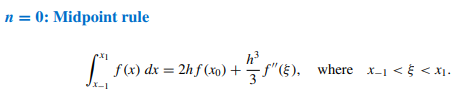

In [ ]:
def f(x):
  return (2*x + 1) / (math.sqrt(x*(1-x)))

def midpoint_rule_n0(a,b,f):
  n = 0
  h = (b-a)/(n+2) # 2 = n+2
  x = a + h
  return 2*h*f(x)

print('La aproximación de la integral en el intervalo (0,1), con n = 0 es:', midpoint_rule_n0(0,1,f))

La aproximación de la integral en el intervalo (0,1), con n = 0 es: 4.0


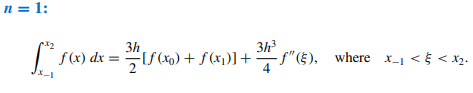

In [ ]:
def midpoint_rule_n1(a,b,f):
  n = 1
  h = (b-a)/(n+2) # 3 = n+2
  x = a + h
  return (3*h/2) * (f(x)+f(x + h))

print('La aproximación de la integral en el intervalo (0,1), con n = 1 es:', midpoint_rule_n1(0,1,f))

La aproximación de la integral en el intervalo (0,1), con n = 1 es: 4.242640687119285


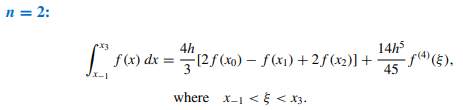

In [ ]:
def midpoint_rule_n2(a,b,f):
  n = 2
  h = (b-a)/(n+2) # 3 = n+2
  x = a + h
  return (4*h/3) * (2*f(x)-f(x + h) + 2*f(x + 2*h))

print('La aproximación de la integral en el intervalo (0,1), con n = 1 es:', midpoint_rule_n2(0,1,f))

La aproximación de la integral en el intervalo (0,1), con n = 1 es: 4.825069538022675


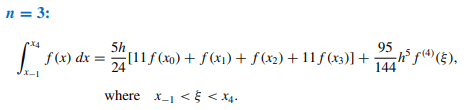

In [ ]:
def midpoint_rule_n3(a,b,f):
  n = 3
  h = (b-a)/(n+2) # 3 = n+2
  x = a + h
  return (5*h/24) * (11*f(x)+f(x + h) + f(x + 2*h) + 11*f(x + 3*h))

print('La aproximación de la integral en el intervalo (0,1), con n = 3 es:', midpoint_rule_n3(0,1,f))

La aproximación de la integral en el intervalo (0,1), con n = 3 es: 4.923540242053219


Notemos que el valor de la integral va variando 'considerablemente' para las reglas del punto medio (abiertas) con $n=0,1,3$, por lo que podemos intuir que el error es grande, de modo que la aproximación no es tan precisa; lo cual se verificará a continuación:

Sin embargo, al obtener la integral exacta por otros medios, se tiene que el resultado es $2\pi \approx 6.2832$  

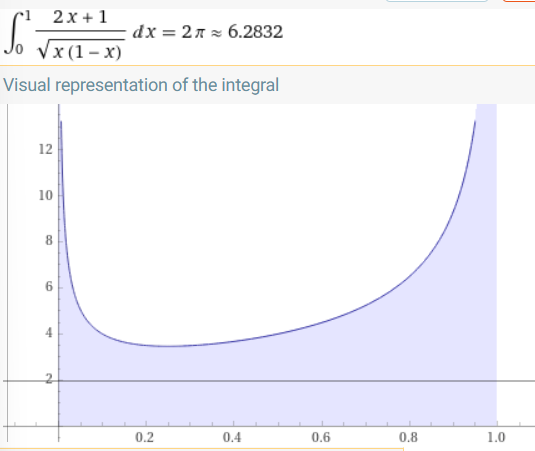


Entonces, se aplicará con un $h$ menor (i.e. un $n$ considerablemente mayor) para obtener una mejor aproximación:

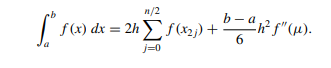

In [ ]:
def composite_midpoint_rule(a,b,f,n): #n debe ser par
  h = (b-a)/(n+2)
  suma = 0
  for j in range(int(n/2)):
    suma = suma + f(a + (2*j + 1) * h)
  return 2*h*suma

a = 0
b = 1

print('La aproximación de la integral en el intervalo (0,1), con n = 0 es:', midpoint_rule_n0(0,1,f))
print('La aproximación de la integral en el intervalo (0,1), con n = 1 es:', midpoint_rule_n1(0,1,f))
print('La aproximación de la integral en el intervalo (0,1), con n = 2 es:', midpoint_rule_n2(0,1,f))
print('La aproximación de la integral en el intervalo (0,1), con n = 3 es:', midpoint_rule_n3(0,1,f))


print('n    -    Aproximación')
for j in range(15,20):
  print(40000*(j+10) , composite_midpoint_rule(a,b,f,40000*(j+10)))

La aproximación de la integral en el intervalo (0,1), con n = 0 es: 4.0
La aproximación de la integral en el intervalo (0,1), con n = 1 es: 4.242640687119285
La aproximación de la integral en el intervalo (0,1), con n = 2 es: 4.825069538022675
La aproximación de la integral en el intervalo (0,1), con n = 3 es: 4.923540242053219
n    -    Aproximación
1000000 6.273763494484445
1040000 6.273946459314648
1080000 6.274119162918958
1120000 6.274282529914301
1160000 6.274437372327187


Se necesitan $n$'s muy grandes para obtener una aproximación más cercana al valor real.

Se puede efectuar un cambio de variable:
$ u = x(1-x)=x-x^2$ , $du = 1-2x dx$, resulta en
\begin{align*}
    \int_0^1 \frac{2x+1}{\sqrt{x(1-x)}} dx = \int_0^1 \frac{2}{\sqrt{x-x^2}}dx
\end{align*}

Aún con el cambio de varible, sólo se pueden utilizar fórmulas de cuadratura abiertas. Veamos el comportamiento de las fómulas con este cambio de variable.

In [ ]:
def g(x):
  return 2/(math.sqrt(x-x**2))

print('Aproximaciones con el cambio de variable:')

print('La aproximación de la integral en el intervalo (0,1), con n = 0 es:', midpoint_rule_n0(0,1,g))
print('La aproximación de la integral en el intervalo (0,1), con n = 1 es:', midpoint_rule_n1(0,1,g))
print('La aproximación de la integral en el intervalo (0,1), con n = 2 es:', midpoint_rule_n2(0,1,g))
print('La aproximación de la integral en el intervalo (0,1), con n = 3 es:', midpoint_rule_n3(0,1,g))

print('\n\n n    -    Aproximación')
for j in range(15,20):
  print(40000*(j+10) , composite_midpoint_rule(a,b,g,40000*(j+10)))


Aproximaciones con el cambio de variable:
La aproximación de la integral en el intervalo (0,1), con n = 0 es: 4.0
La aproximación de la integral en el intervalo (0,1), con n = 1 es: 4.242640687119285
La aproximación de la integral en el intervalo (0,1), con n = 2 es: 4.825069538022675
La aproximación de la integral en el intervalo (0,1), con n = 3 es: 4.923540242053219


 n    -    Aproximación
1000000 6.275763489483921
1040000 6.275907615951764
1080000 6.276043659361186
1120000 6.276172348060921
1160000 6.276294321707236


No se observan diferencias al comparar los métodos del punto medio con $n=0,1,2,3$ al aplicarlo con la función original y con su cambio de variable.

En cambio, se puede notar una mejora (mínima) en el método con $n$'s más grandes:

In [ ]:
print('\n\n n    -    Original    -     Cambio de variable')
for j in range(1,20):
  print(40000*(j+10) , composite_midpoint_rule(a,b,f,40000*(j+10)) , composite_midpoint_rule(a,b,g,40000*(j+10)))



 n    -    Original    -     Cambio de variable
440000 6.268981410766187 6.27199650708071
480000 6.26958610877443 6.272472845085512
520000 6.270119617583868 6.272893105230986
560000 6.270594891673521 6.2732674921613265
600000 6.271021808559096 6.273603786698273
640000 6.271408048880612 6.273908039114936
680000 6.27175968716832 6.27418503450209
720000 6.272081599367193 6.274438613787113
760000 6.272377750710099 6.274671900502242
800000 6.2726514033598155 6.274887464349587
840000 6.272905268974257 6.27508744138207
880000 6.273141622664725 6.27527362377153
920000 6.273362389388272 6.275447527862286
960000 6.273569210322525 6.275610446459017
1000000 6.273763494484445 6.275763489483921
1040000 6.273946459314648 6.275907615951764
1080000 6.274119162918958 6.276043659361186
1120000 6.274282529914301 6.276172348060921
1160000 6.274437372327187 6.276294321707236


En conclusión: el cambio de variable ayuda a obtener una mejor aproximación y es conveniente y necesario utilizar una fórmula de cuadratura abierta con una cantidad de nodos considerable.

## Problema 7

7. (a) Mediante el método de ajuste por mínimos cuadrados ajusta una curva lineal y cuadrática a los datos



|  |  |  |  |  | | | |  |
| ----- | --- | ----- | ---- | ---  | ---- | ---- | ---- | ---- |
$x$ | 1.0 | 2.5 | 3.5 | 4.0 | 1.1 | 1.8 | 2.2 | 3.7
$y$ | 6.008 | 15.722 | 27.13 | 33.772 | 5.257 | 9.549 | 11.098 | 28.828
|  |  |  |  |  | | | |  |


¿Qué curva ajusta mejor y por qué?


(b) Mediante el uso de un polinomio interpolador (Justificar la elección) determina el valor de y cuando $x = 0.46$ considerando la siguiente tabla.

|  |  |  |  |  | | | |  |
| ----- | --- | ----- | ---- | ---  | ---- | ---- | ---- | ---- |
$x$ | 0 | 0.0204 | 0.1055 | 0.241 | 0.582 | 0.712 | 0.981
$y$ | 0.385 | 1.04 | 1.79 | 2.63 | 4.39 | 4. 99 | 5.27
|  |  |  |  |  | | | |  |


In [ ]:
# inciso a)
def minimos_cuad_lin(x,y):
  plt.scatter(x,y,marker = '+', color = 'mediumvioletred')
  m = len(x) # cantidad de nodos
  suma_x = 0 # suma de las x's
  suma_x2 = 0 # suma de las x^2
  suma_y = 0
  suma_xy = 0

  for j in range(m):
    suma_x = suma_x + x[j]
    suma_x2 = suma_x2 + x[j]**2
    suma_y = suma_y + y[j]
    suma_xy = suma_xy + x[j]*y[j]
  
  #print(suma_x,suma_y,suma_x2,suma_xy)

  a0 = (suma_x2 * suma_y - suma_xy*suma_x)/(m*suma_x2 - suma_x**2)
  a1 = (m*suma_xy - suma_x * suma_y)/(m*suma_x2 - suma_x**2)
  #print(a0,a1)
  print('Recta obtenida:',a1,'x +',a0)

  p1 = [min(x)-1 , a1*(min(x)-1) + a0]
  p2 = [max(x)+1 , a1*(max(x)+1) + a0]
  plt.plot( [p1[0],p2[0]] , [p1[1],p2[1]] , color = 'darkcyan')
  plt.legend(["Recta-aproximación: a1x+a0" , "nodos"])

  return a0,a1

def evalua_min_cuad(punto, x,y): #regresa el valor de la aproximación de y (punto,y) en la recta obtenida
  a0 , a1 = minimos_cuad_lin(x,y)
  plt.plot([punto] , a1*punto + a0)
  return a1*punto + a0


def grafica_curva_mc(a,x):
  plt.scatter(x,y,marker = '+', color = 'mediumvioletred')
  L = np.linspace(min(x)-1 , max(x)+1)
  plt.plot(L , a[0] + a[1]*L + a[2]*L*L , color = 'olive')
 

def minimos_cuad_cuad(x,y):
  m = len(x)
  # sumas[0] |sumas[1] sumas[2] sumas[3] sumas[4] sumas[5]  sumas[6]   sumas[7] 
  # x[i]^0   | x[i]^1 | x[i]^2 | x[i]^3 | x[i]^4  | y[i]   | x[i]y[i] | x[i]^2y
  sumas = np.zeros(8)
  sumas[0] = m # suma de los x[i]^0
  for j in range(m):
    for k in range(1,4+1):
      sumas[k] = sumas[k] + x[j]**k
    for k in range(5, 7+1):
      sumas[k] = sumas[k] + y[j]*(x[j]**(k-5))

  A = np.array([[sumas[0] , sumas[1] , sumas[2]],
                [sumas[1] , sumas[2] , sumas[3]],
                [sumas[2] , sumas[3] , sumas[4]] ])
  
  b = np.array([sumas[5],sumas[6],sumas[7]]) 
  
  a = np.linalg.solve(A,b) # sol al sist de ecs A*a = b

  print('Curva obtenida:', a[0] , '+', a[1] , 'x +', a[2],'x^2' )

  # grafica la curva
  plt.scatter(x,y,marker = '+', color = 'mediumvioletred')
  L = np.linspace(min(x)-1 , max(x)+1)
  plt.plot(L , a[0] + a[1]*L + a[2]*L*L , color = 'olive')
  plt.legend(["Curva/aproximación" , "nodos"])
  # -fin graficar

  return a

def evalua_min_cuad_cuad(L,x,y):
  a = minimos_cuad_cuad(x,y)
  plt.plot([L], [a[0] + a[1]*L + a[2]*L*L], marker = '.' , color = 'black')
  return a[0] + a[1]*L + a[2]*L*L

Recta obtenida: 9.43854353562004 x + -6.189895250659591


(-6.189895250659591, 9.43854353562004)

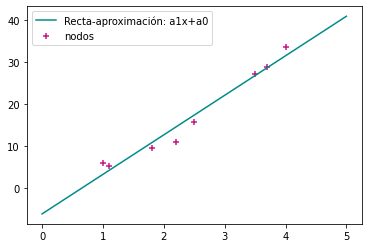

In [ ]:
x = [1.0 , 2.5, 3.5 , 4.0 , 1.1 , 1.8 , 2.2 , 3.7]
y = [6.008 , 15.722 , 27.13 , 33.772 , 5.257 , 9.549 , 11.098 , 28.828]

minimos_cuad_lin(x,y)

Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2


array([ 4.40567377, -1.06889613,  2.10811822])

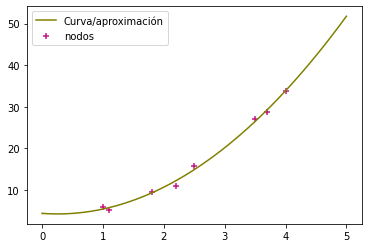

In [ ]:
minimos_cuad_cuad(x,y)

Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2


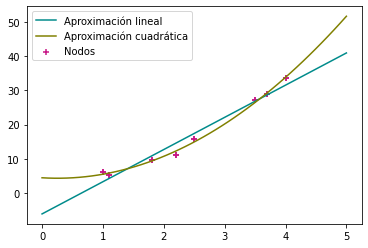

In [ ]:
minimos_cuad_lin(x,y)
minimos_cuad_cuad(x,y)
plt.legend(["Aproximación lineal", "Aproximación cuadrática","Nodos"])

¿Cuál ajusta mejor? La curva de la aproximación cuadrática aproxima mejor. Esto se da gracias al estudio del errpr

Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x + -6.189895250659591
Curva obtenida: 4.405673769461011 + -1.0688961309258682 x + 2.108118215400891 x^2
Recta obtenida: 9.43854353562004 x

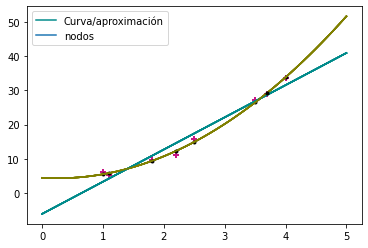

In [ ]:
error_cuad = 0
error_lin = 0
for j in range(len(x)):
  error_lin = error_lin + (y[j] - evalua_min_cuad(x[j],x,y) )**2
  error_cuad = error_cuad + (y[j] - evalua_min_cuad_cuad(x[j],x,y) )**2

In [ ]:
print('El error total de la aproximación lineal es ',error_lin)
print('El error total de la aproximación cuadrática es ',error_cuad)

print('De forma que el error de la aproximación cuadrática es mucho menor que el error de la aproximación lineal.\n Por lo que la aproximación cuadrática es mejor (se observa también al empalmar las gráficas)')

El error total de la aproximación lineal es  30.20147190079154
El error total de la aproximación cuadrática es  3.304259349317638
De forma que el error de la aproximación cuadrática es mucho menor que el error de la aproximación lineal.
 Por lo que la aproximación cuadrática es mejor (se observa también al empalmar las gráficas)


b) Se tienen 7 nodos; se puede utilizar cualquier polinomio interpolador, por conveniencia, compararé las aproximaciones obtenidas mediante el polinomio interpolador de Newton y el polinomio interpolador de Lagrange

In [ ]:
# b) 
def Newton(x,xj):
  n = len(xj)
  D = np.zeros((n,n))
  for i in range(n):
    D[i,0] = f(xj[i])

  for j in range(1,n):
    for i in range(n-j):
      D[i,j] = (D[i+1,j-1]-D[i,j-1])/(xj[i+j]-xj[i])
  
  s = f(xj[0])

  for j in range(1,n):
    prod = 1
    for i in range(j):
      prod = prod*(x-xj[i])

    s = s + D[0,j]*prod
  
  print('Aproximación',s)
  return(s)


x0 = 0.46
x =  [0 , 0.0204 , 0.1055 , 0.241 , 0.582 , 0.712 , 0.981]
y = [ 0.385 , 1.04 , 1.79 , 2.63 , 4.39 , 4.99 , 5.27]

def f(x0):
  return y[x.index(x0)]


ap = Newton(x0,x)
#print('Aproximación',Newton(x0,x))

Aproximación 4.878535591876114


In [ ]:
def L(x,xj,i):
  n = len(xj)
  l = 1
  for j in range(n):
    if j == i:
      continue
    l = l * (x-xj[j])/(xj[i]-xj[j])

  return l 

def lagrange(x,xj):
  n = len(xj)
  s = 0
  for i in range(n):
    s = s + L(x,xj,i)*f(xj[i])
  return s

print('Aproximación con Lagrange',lagrange(x0,x))

Aproximación con Lagrange 4.878535591876102


Ambas aproximaciones son muy similales.